#### 필수과제
- 트위터에 대통령 선거 관련된 문자열 데이터
- 대통령 이름도 있고, 여러가지 후보자 이름도 있을 것
- 정규식으로 전처리하시고, 실제 의미있는 키워드를 빈도를 추출하고
- 후보자와 관련이 가장 깊은 키워드는 무엇인지?
- 그걸 간단하게 시각화하여 실제로 어떤 후보자가 어떤 키워드를 가지고 있다는 것으 보여주세요!

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,184 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128275 files and di

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDAA 학회/데이터셋/tweet_jae.csv')

In [5]:
df

status_id screen_name           created_at  \
0     1295242650363154433  park_pyung  2020-08-17 06:14:46   
1     1294137207121297409    Otranso2  2020-08-14 05:02:08   
2     1294285873027014656  hyoker3690  2020-08-14 14:52:53   
3     1294154164272939009  hyoker3690  2020-08-14 06:09:31   
4     1294092935877652480  Sunny38251  2020-08-14 02:06:13   
...                   ...         ...                  ...   
8561  1293704470996557824      QVh027  2020-08-13 00:22:36   
8562  1293706115528527873    hezii631  2020-08-13 00:29:08   
8563  1293704734507859969    junsun88  2020-08-13 00:23:39   
8564  1293704250019549184      hjg002  2020-08-13 00:21:43   
8565  1293699250342117377  tjrtka7622  2020-08-13 00:01:51   

                                                   text  
0     -&gt; (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n...  
1     "차기선호도 이재명 19% 이낙연 17%…첫 역전"(종합)https://t.co/n...  
2     안철수 시즌2라~~~ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ [‘이낙연 대세론’ 흔들…이재명,...  
3     조작미터도 모자라 갤럽까지 제대로 미쳤군.\n대통령과 당 지지율이 떨어졌는데\n이재...  
4     @yonhaptweet SNS로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이...  
...                                                 ...  
8561  이재명이가 추진하고 있는 토지 공개념화에 대한 대법원 판례가 규제를 인정했다고 해서...  
8562  인물열전] 이재명에게서 노무현을 보다…“진짜 민주주의를 향한 위대한 발걸음”\n온라...  
8563  @Jaemyung_Lee 믿을 사람은 이재명뿐이요 ㅡ토지거래허가제  당장해서   실...  
8564  뻐꾹이와 이재명, 김경수까지 변호를? 그 피데스 동지들이 법을 유린하고 있다 많이 ...  
8565  @Jaemyung_Lee 이재명도시사를 응원하는 사람입니다.\n무엇이든 장단이 있습...  

[8566 rows x 4 columns]

전처리
- 의미없는 단어 버리기 -> 불용어, 한글자 단어, 등등
- 일단, 한글만추출, 명사위주로 추출
- 삭제하지 않고 새로운 행으로 추가


In [6]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:13 http://security.ubuntu.com/ubuntu focal-se

In [7]:
import re 

In [8]:
df['kor_text'] = df['text'].str.replace('[^ㄱ-ㅎ|가-힣|\s]', '').to_frame() # 한글과 띄어쓰기를 제외하고 제거하여 kor_text라는 새로운 컬럼 생성

<ipython-input-8-a9a50a5c8452>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['kor_text'] = df['text'].str.replace('[^ㄱ-ㅎ|가-힣|\s]', '').to_frame() # 한글과 띄어쓰기를 제외하고 제거하여 kor_text라는 새로운 컬럼 생성


In [9]:
from konlpy.tag import Okt

In [10]:
okt = Okt()
text = df['kor_text'].iloc[1] 
okt.nouns(text)  # okt 에서 명사를 추출하는 법

['차기', '선호', '이재명', '이낙연', '첫', '역전', '종합']

In [11]:
with open('/content/drive/MyDrive/Colab Notebooks/BDAA 학회/데이터셋/korean_stopwords.txt', encoding = 'utf8') as stopword:
  stopwords = stopword.readlines()
# 한국어 불용어를 txt파일로 만들어 불러옴
# 출처 : https://www.ranks.nl/stopwords/korean

In [12]:
stopwords = [stopword.strip() for stopword in stopwords] # stopword를 list comprehension 을 이용하여 저장
                                                         # strip() 메서드는 원래 문자열의 양쪽의 공백을 제거한 문자열을 리턴

In [13]:
def get_nouns(text): # 명사를 추출하는 사용자 정의함수
  okt = Okt()
  nouns = okt.nouns(text)

  nouns = [noun for noun in nouns if len(noun) > 1] # 한 글자인 명사 삭제
  nouns = [noun for noun in nouns if noun not in stopwords] # 불용어 삭제

  return nouns

In [14]:
df['kor_nouns'] = df['kor_text'].apply(lambda x : get_nouns(x)) # 데이터프레임의 컬럼 하나를 불러오면 시리즈 형태가 되므로 apply 함수를 이용하여 사용자 정의함수 적용

In [15]:
df

status_id screen_name           created_at  \
0     1295242650363154433  park_pyung  2020-08-17 06:14:46   
1     1294137207121297409    Otranso2  2020-08-14 05:02:08   
2     1294285873027014656  hyoker3690  2020-08-14 14:52:53   
3     1294154164272939009  hyoker3690  2020-08-14 06:09:31   
4     1294092935877652480  Sunny38251  2020-08-14 02:06:13   
...                   ...         ...                  ...   
8561  1293704470996557824      QVh027  2020-08-13 00:22:36   
8562  1293706115528527873    hezii631  2020-08-13 00:29:08   
8563  1293704734507859969    junsun88  2020-08-13 00:23:39   
8564  1293704250019549184      hjg002  2020-08-13 00:21:43   
8565  1293699250342117377  tjrtka7622  2020-08-13 00:01:51   

                                                   text  \
0     -&gt; (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n...   
1     "차기선호도 이재명 19% 이낙연 17%…첫 역전"(종합)https://t.co/n...   
2     안철수 시즌2라~~~ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ [‘이낙연 대세론’ 흔들…이재명,...   
3     조작미터도 모자라 갤럽까지 제대로 미쳤군.\n대통령과 당 지지율이 떨어졌는데\n이재...   
4     @yonhaptweet SNS로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이...   
...                                                 ...   
8561  이재명이가 추진하고 있는 토지 공개념화에 대한 대법원 판례가 규제를 인정했다고 해서...   
8562  인물열전] 이재명에게서 노무현을 보다…“진짜 민주주의를 향한 위대한 발걸음”\n온라...   
8563  @Jaemyung_Lee 믿을 사람은 이재명뿐이요 ㅡ토지거래허가제  당장해서   실...   
8564  뻐꾹이와 이재명, 김경수까지 변호를? 그 피데스 동지들이 법을 유린하고 있다 많이 ...   
8565  @Jaemyung_Lee 이재명도시사를 응원하는 사람입니다.\n무엇이든 장단이 있습...   

                                               kor_text  \
0      지난 개월 동안은 엎치락뒤치락 안 했는데 본격화되지 않았던 것\n\n 이재명은 적...   
1                                 차기선호도 이재명  이낙연 첫 역전종합   
2     안철수 시즌라ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이낙연 대세론 흔들이재명 여권 추락 속 ...   
3     조작미터도 모자라 갤럽까지 제대로 미쳤군\n대통령과 당 지지율이 떨어졌는데\n이재명...   
4      로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이낙연\n당연히 이낙연 아닌가...   
...                                                 ...   
8561  이재명이가 추진하고 있는 토지 공개념화에 대한 대법원 판례가 규제를 인정했다고 해서...   
8562  인물열전 이재명에게서 노무현을 보다진짜 민주주의를 향한 위대한 발걸음\n온라인| \...   
8563   믿을 사람은 이재명뿐이요 토지거래허가제  당장해서   실거주가 아니면  못사게  ...   
8564  뻐꾹이와 이재명 김경수까지 변호를 그 피데스 동지들이 법을 유린하고 있다 많이 배워...   
8565   이재명도시사를 응원하는 사람입니다\n무엇이든 장단이 있습니다\n향후 오늘 정책이 ...   

                                              kor_nouns  
0     [지난, 개월, 엎치락뒤치락, 본격, 이재명, 적극, 행보, 이낙연, 행보, 최근,...  
1                            [차기, 선호, 이재명, 이낙연, 역전, 종합]  
2                   [안철수, 시즌, 이낙연, 세론, 이재명, 여권, 추락, 홀로]  
3     [조작, 모자라, 갤럽, 제대로, 대통령, 지지율, 이재명, 오른, 이유, 뭔가, ...  
4                   [폭우, 이재명, 수해, 현장, 구슬, 이낙연, 이낙연, 고추]  
...                                                 ...  
8561  [이재명, 추진, 토지, 개념화, 대한, 대법원, 판례, 규제, 인정, 판례, 선례...  
8562  [인물, 열전, 이재명, 노무현, 진짜, 민주주의, 발걸음, 온라인, 손시, 경인,...  
8563                             [사람, 이재명, 토지거래허가제, 거주]  
8564                [뻐꾹, 이재명, 김경수, 변호, 피데스, 동지, 유린, 항상]  
8565  [이재명, 시사, 응원, 사람, 장단, 향후, 오늘, 정책, 문제, 깊이, 검토, ...  

[8566 rows x 6 columns]

#### 연관분석

In [16]:
!pip install apriori apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for apriori: filename=apriori-1.0.0-py3-none-any.whl size=2478 sha256=2be7eacf450766861e4eca40c28b5b2d2e5652cb27cea728a1b9d92e1994e511
  Stored in directory: /root/.cache/pip/wheels/e5/13/06/4f2e9149db374a829b7ee97bad99c9abffbf30976a81779b1c
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=f1ab6418f036f7f97f5560636e9463ed6babc7fbaf9b8a0810e6052e583bcb26
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apriori apyori


In [17]:
from apyori import apriori

- transaction 데이터 생성 

In [18]:
transactions = df['kor_nouns'].tolist() # 리스트 형태로 변환하여 리스트 안에 리스트가 들어있는 장바구니 형태로 데이터를 생성

In [19]:
transactions = [transaction for transaction in transactions if transaction] # 공백 방지

In [20]:
print(transactions)

[['지난', '개월', '엎치락뒤치락', '본격', '이재명', '적극', '행보', '이낙연', '행보', '최근', '현안', '대한', '태도', '한번', '보라', '참고', '사랑', '교회', '목사', '관련', '이낙연', '의원', '직접', '기한', '상태', '이재명', '경기도', '대변인', '통해', '언급'], ['차기', '선호', '이재명', '이낙연', '역전', '종합'], ['안철수', '시즌', '이낙연', '세론', '이재명', '여권', '추락', '홀로'], ['조작', '모자라', '갤럽', '제대로', '대통령', '지지율', '이재명', '오른', '이유', '뭔가', '조작', '이재명', '이낙연', '차기', '정치인', '선호', '역전'], ['폭우', '이재명', '수해', '현장', '구슬', '이낙연', '이낙연', '고추'], ['이재명', '지지', '자건', '이낙연', '지지', '자건', '문재인', '어쩌'], ['이낙연', '회피', '이재명', '뻥카'], ['유튜브', '결론', '안철수', '대표', '이재명', '안철수', '이낙연', '안철수', '대도'], ['정치권', '화두', '지지율', '희비', '여권', '중진', '부동산', '정책', '영향', '이재명', '이낙연', '박주민', '민주당'], ['남국', '이낙연', '의원', '현안', '대해', '태도', '보이', '이재명', '도지사', '사이다', '얘기', '지지율', '유권자', '문제해결', '능력', '가르마', '리더십', '찢빠', '정치'], ['갤럽', '민주당', '지층', '이낙연', '이재명', '통합', '지층', '이낙연', '정의당', '지층', '이낙연', '무당', '이낙연', '호남', '이낙연', '부울경', '이낙연'], ['이낙연', '의원님', '어서', '민주당', '대표', '안정', '이재명', '김부겸', '박주민', '자꾸만'], ['요즘', '이재

In [21]:
results = list(apriori(transactions)) # 연관분석 진행
results

[RelationRecord(items=frozenset({'이낙연'}), support=0.12106000466962409, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'이낙연'}), confidence=0.12106000466962409, lift=1.0)]),
 RelationRecord(items=frozenset({'이재명'}), support=0.999766518795237, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'이재명'}), confidence=0.999766518795237, lift=1.0)]),
 RelationRecord(items=frozenset({'지사'}), support=0.10938594443147327, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'지사'}), confidence=0.10938594443147327, lift=1.0)]),
 RelationRecord(items=frozenset({'이낙연', '이재명'}), support=0.12082652346486109, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'이낙연', '이재명'}), confidence=0.12082652346486109, lift=1.0), OrderedStatistic(items_base=frozenset({'이낙연'}), items_add=frozenset({'이재명'}), confidence=0.9980713596914177, lift=0.9983044450159603), OrderedStatistic(items_base=fro

In [22]:
columns = ['source', 'target', 'support']  
network_df = pd.DataFrame(columns = columns) # 컬럼명이 source, target, support인 데이터프레임 생성성

for result in results:
  if len(result.items) == 2:  # 연관분석 진행한 것 중 대상이 2개인 것만 추출
    items = [x for x in result.items] # 분석 대상을 items에 저장
    row = [items[0], items[1], result.support] # 위에 network_df 에 들어갈 행 생성
    series = pd.Series(row, index = network_df.columns) # 생성된 행을 시리즈 형태로 변환
    network_df = network_df.append(series, ignore_index = True) # 위에서 생성한 데이터프레임에 조건에 맞는 시리즈를 할당

In [23]:
network_df

source target   support
0    이낙연    이재명  0.120827
1    이재명     지사  0.109386

#### 키워드 연관 분석

- 말뭉치 추출

In [24]:
corpus = "".join(df['kor_text'].tolist()) # 한국어만 필터링된 컬럼을 리스트로 변형하여 구분자 없이 하나로 이어붙여 말뭉치를 추출
print(corpus)

 지난 개월 동안은 엎치락뒤치락 안 했는데 본격화되지 않았던 것

 이재명은 적극적인 행보 이낙연은 신중한 행보인데

 최근 현안에 대한 태도를 한번 잘 보라
참고 사랑제일교회 전목사 관련 이낙연 의원은 직접 문제제기한 상태 이재명은 경기도 대변인 통해서 언급차기선호도 이재명  이낙연 첫 역전종합안철수 시즌라ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이낙연 대세론 흔들이재명 여권 추락 속 홀로 날 조작미터도 모자라 갤럽까지 제대로 미쳤군
대통령과 당 지지율이 떨어졌는데
이재명만 오른 이유가 뭔가
조작이 아닌가 이재명 이낙연 차기 정치인선호도 역전  로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이낙연
당연히 이낙연 아닌가
전 고추점자리가 싫어요이재명 지지자건 이낙연 지지자건
문재인이 뭐 물렀느니 어쩌니이낙연은 회피형
이재명은 뻥카형 유튜브 올렸는데요
결론은
안철수대표가 
이재명대 안철수
이낙연대 안철수
그런대도 이긴다고요 ㅎ정치권 화두는 지지율 희비여권 중진들 부동산 정책 영향 딛고 일어서야
이재명 이낙연 박주민 더불어민주당
김남국 이낙연 의원은 현안에 대해 신중한 태도를 보이고 있지만 이재명 경기도지사는 사이다 같은 얘기를 하다 보니까 지지율이 올라가는 것 같다 많은 유권자들이 문제해결 능력과 확실하게 가르마를 타주는 리더십을 원한다

이래도 찢빠가 아니라구  당당하게 찢밍아웃하고 정치해갤럽 

더불어민주당 지지층 
이낙연   이재명

통합당 지지층
이낙연  찢재명

정의당지지층
이낙연  찢재명

무당층
이낙연  찢재명

호남
이낙연  찢재명

부울경
이낙연   찢재명 이낙연 의원님이 어서 민주당 당대표가 되셔서 안정을 찾아야 할것 같습니다
이재명 조응천 김부겸 박주민이 자꾸만 선을 넘는 짓을 합니다 요즘 이재명 지지자란 것들이 이낙연 의원님에 대한 흑색선전 퍼뜨리고 다닙니다

대통령님 정부에 총질해대는건 말할것도 없구요

 이때다 싶어 정부여당에 총질하는 이재명 박주민

저렇게 타 후보와 당원을 가족처럼 여기시는 이낙연 의원님 발끝이나 쫒아가겠냐

태도가 본질이다

In [25]:
from collections import Counter

In [26]:
nouns = get_nouns(corpus) # 전에 정의한 사용자 정의함수 이용 ; 두 글자 이상, 불용어를 제외한 명사 추출

In [27]:
print(nouns)

['지난', '개월', '엎치락뒤치락', '본격', '이재명', '적극', '행보', '이낙연', '행보', '최근', '현안', '대한', '태도', '한번', '보라', '참고', '사랑', '교회', '목사', '관련', '이낙연', '의원', '직접', '기한', '상태', '이재명', '경기도', '대변인', '통해', '언급', '차기', '선호', '이재명', '이낙연', '역전', '종합', '안철수', '시즌', '이낙연', '세론', '이재명', '여권', '추락', '홀로', '조작', '모자라', '갤럽', '제대로', '대통령', '지지율', '이재명', '오른', '이유', '뭔가', '조작', '이재명', '이낙연', '차기', '정치인', '선호', '역전', '폭우', '이재명', '수해', '현장', '구슬', '이낙연', '이낙연', '고추', '이재명', '지지', '자건', '이낙연', '지지', '자건', '문재인', '어쩌', '이낙연', '회피', '이재명', '뻥카', '유튜브', '결론', '안철수', '대표', '이재명', '안철수', '이낙연', '안철수', '대도', '정치권', '화두', '지지율', '희비', '여권', '중진', '부동산', '정책', '영향', '이재명', '이낙연', '박주민', '민주당', '남국', '이낙연', '의원', '현안', '대해', '태도', '보이', '이재명', '도지사', '사이다', '얘기', '지지율', '유권자', '문제해결', '능력', '가르마', '리더십', '찢빠', '정치', '갤럽', '민주당', '지층', '이낙연', '이재명', '통합', '지층', '이낙연', '정의당', '지층', '이낙연', '무당', '이낙연', '호남', '이낙연', '부울경', '이낙연', '이낙연', '의원님', '어서', '민주당', '대표', '안정', '이재명', '김부겸', '박주민', '자꾸만', '요즘', '이재명', '지지자', '이낙연', '의원님', 

In [28]:
count = Counter(nouns) # Counter object를 이용하여 각 명사가 출현한 빈도를 추출
print(count)

Counter({'이재명': 10401, '이낙연': 1240, '민주당': 1026, '지사': 1020, '경기도': 981, '지지율': 815, '대통령': 719, '사람': 685, '국민': 660, '후보': 578, '코로나': 526, '대선': 485, '대권': 440, '뉴스': 419, '지지': 418, '경기': 400, '생각': 395, '정부': 379, '새끼': 378, '문재인': 369, '전광훈': 361, '지금': 359, '도지사': 350, '행정': 342, '차기': 339, '정치': 339, '지지자': 338, '교회': 327, '언론': 326, '이해찬': 297, '역전': 271, '진짜': 261, '주자': 260, '행정명령': 248, '방역': 245, '출처': 244, '기사': 235, '모든': 227, '의원': 225, '재난': 224, '때문': 222, '대표': 215, '인간': 215, '집합': 211, '나라': 210, '네이버': 201, '기본소득': 199, '마스크': 198, '선호': 197, '종교시설': 194, '문제': 193, '이유': 191, '사랑': 190, '제한': 189, '도민': 185, '통합': 184, '시장': 184, '소리': 183, '정책': 179, '이제': 179, '기레기': 174, '지금껏': 172, '정권': 171, '선거': 166, '그냥': 163, '공매도': 160, '조국': 159, '금지': 159, '김부선': 150, '윤석열': 148, '전설': 148, '집회': 146, '보고': 145, '여론조사': 142, '부동산': 141, '정치인': 137, '공정': 137, '중고차': 137, '위해': 136, '상황': 136, '보지': 136, '수해': 134, '원금': 134, '한국': 133, '정말': 132, '반대': 132, '조사': 131,

In [29]:
df_count = pd.DataFrame(count.items(), columns = ['key', 'count'])
df_count = df_count[df_count['count'] > 300] # 시각화를 위해 300개 이상 출현한 단어들만으로 필터링링

In [30]:
df_count

key  count
4     이재명  10401
7     이낙연   1240
16     교회    327
23    경기도    981
27     차기    339
41    대통령    719
42    지지율    815
52     지지    418
54    문재인    369
70    민주당   1026
74    도지사    350
83     정치    339
96    지지자    338
99     정부    379
102    후보    578
107    사람    685
109    언론    326
110    생각    395
128    뉴스    419
171    새끼    378
177    대선    485
181    국민    660
183    지사   1020
210    대권    440
231    지금    359
314    경기    400
550   전광훈    361
801   코로나    526
1012   행정    342

- 시각화

In [31]:
import seaborn as sns

Text(0, 0.5, '출현 빈도')

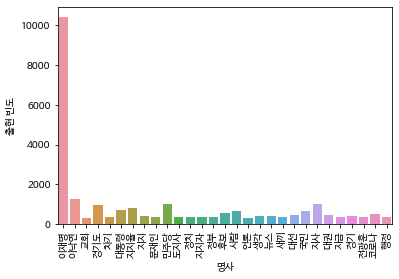

In [52]:
sns.barplot(x = 'key', y = 'count', data = df_count) # 출현 빈도 시각화
plt.xticks(rotation = 90)
plt.xlabel('명사')
plt.ylabel('출현 빈도')

In [32]:
!pip install networkx 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import networkx as nx # networkx 모듈을 이용하여 시각화

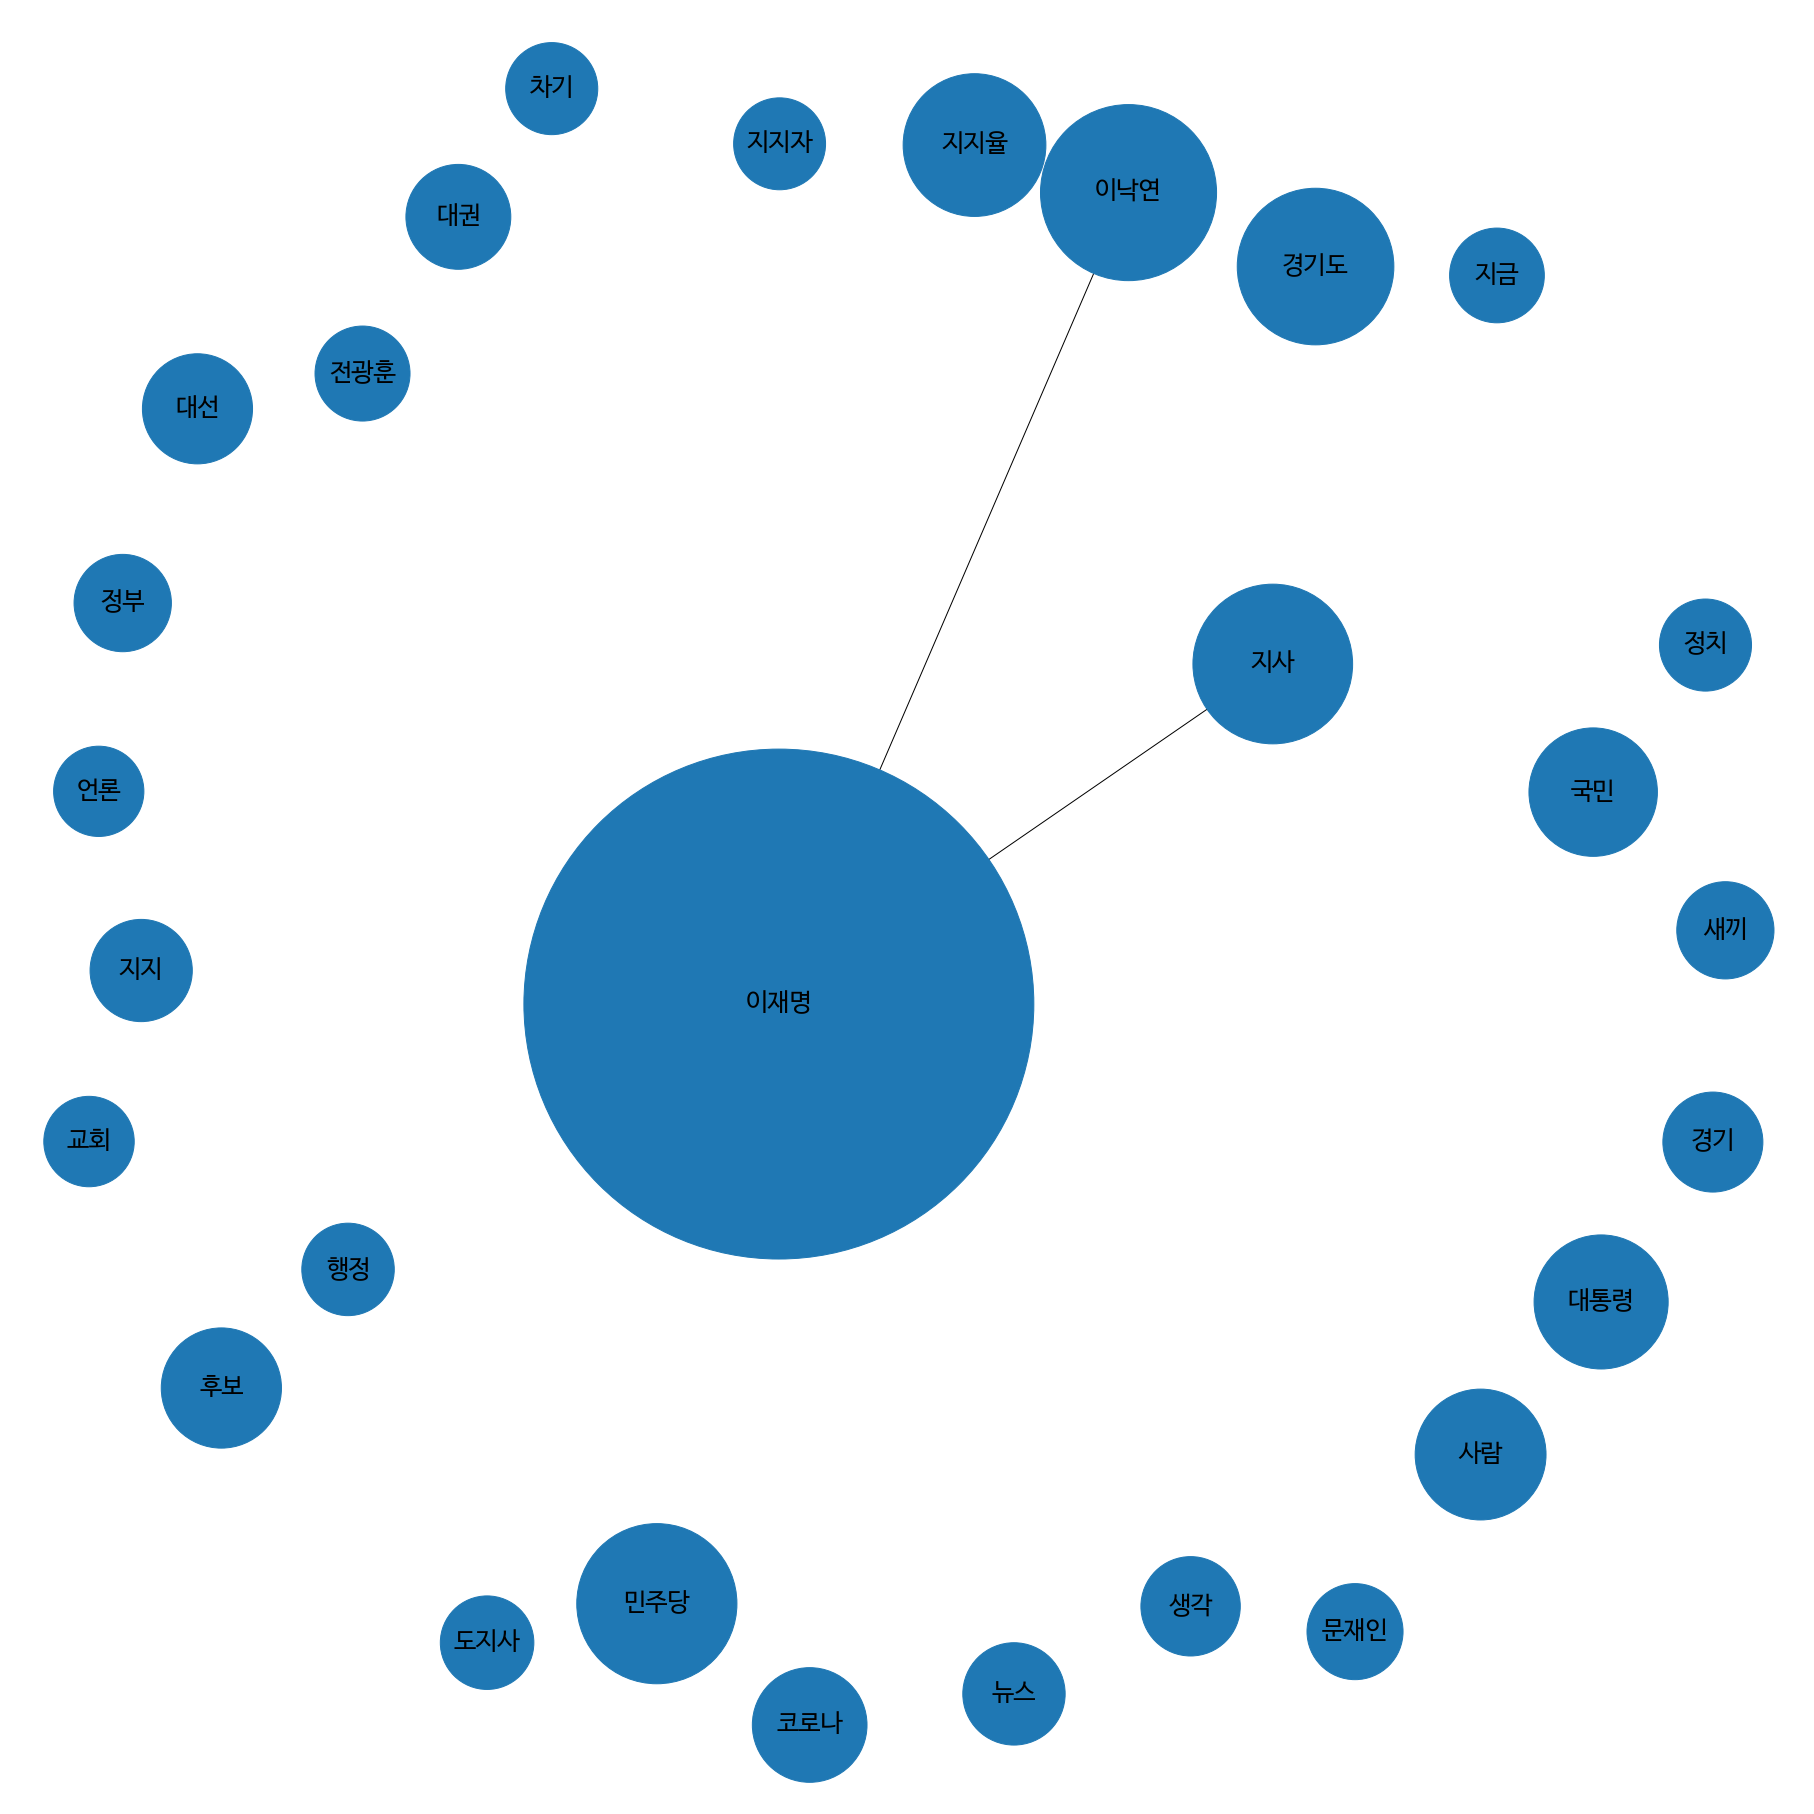

In [41]:
plt.figure(figsize = (25, 25))
G = nx.Graph() # 그래프 객체 생성

for index, row in df_count.iterrows(): # iterrows 메서드는 데이터의 행-열/데이터 정보를 튜플 형태의 generator 객체로 반환하는 메서드 
  G.add_node(row['key'], nodesize = row['count'])  # key 값을 노드로, 노드사이즈는 key의 출현 빈도인 count 컬럼으로 설정

for index, row in network_df.iterrows():
  G.add_weighted_edges_from([(row['source'], row['target'], row['support'])]) # 연관성의 정도를 표현하기 위해 가중치를 지정하여 edge를 표현

pos = nx.spring_layout(G, k = 0.6, iterations = 50) # layout에서 노드의 위치를 결정
sizes = [G.nodes[node]['nodesize']*25 for node in G] # 노드의 사이즈 결정
nx.draw(G, pos = pos, node_size = sizes)

nx.draw_networkx_labels(G, pos = pos, font_family = 'NanumBarunGothic', font_size = 25) # 그래프의 label 표현

ax = plt.gca() # 현재 객체의 axes를 반환
plt.show()